# Introduction:
## Bank Marketing Dataset
### This dataset is based on the "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 
### It contains information about the marketing campaign impact of a bank specifically through telemarketing. 
### Dataset have 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.

# Description:
### The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [787]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import datetime
import warnings
warnings.filterwarnings("ignore")

# Problem Statement:
### Depending on the analysis can divide the customers into specific groups with some common characteristics between them.
### Try and find out which campaign was effective for which type/group of people and see if they have anything common among them
### Do the same for the people who did not respond to a campaign well and see if they have anything in common with each other


In [788]:
#import first dataset
train=pd.read_csv("C:/Users/Chinmay/Downloads/train.csv",sep=";")
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [789]:
#import second dataset
test=pd.read_csv("C:/Users/Chinmay/Downloads/test.csv",sep=";")
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [790]:
#concat both dataset
df = pd.concat([train,test])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Information
## bank client data:
###### 1 - age (numeric)
###### 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
###### 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
###### 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
###### 5 - default: has credit in default? (categorical: 'no','yes','unknown')
###### 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
###### 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
###### 8 - contact: contact communication type (categorical: 'cellular','telephone')
###### 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
###### 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
###### 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
###### 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
###### 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
###### 14 - previous: number of contacts performed before this campaign and for this client (numeric)
###### 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
###### Output variable (desired target):
###### 16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [791]:
#checking last 30 rows
data.tail(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no
45182,34,technician,married,secondary,no,133,no,no,cellular,15,nov,401,2,187,5,success,yes
45183,70,retired,married,primary,no,324,no,no,cellular,15,nov,78,1,96,7,success,no
45184,63,retired,married,secondary,no,1495,no,no,cellular,16,nov,138,1,22,5,success,no
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,yes
45186,59,unknown,married,unknown,no,1500,no,no,cellular,16,nov,280,1,104,2,failure,no
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,yes
45189,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes


In [792]:
#dropping duplicate values
data=df.drop_duplicates()

In [793]:
#crosscheck value count
data.shape

(45211, 17)

In [794]:
#checking the unique value of each column
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [795]:
#column info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [796]:
#describe numerical columns
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Summary 
### Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
### The mean balance is 1,362. However, the Standard Deviation (std) is a high number and minimum balance is in negative so we can understand through this that the balance is heavily distributed across the dataset.
### Mean duration of call is 258 seconds.
### There average 3 number of contacts performed during this campaign and for this client includes last contact. 

In [797]:
#It seems that there is no null data. Just to be sure, let's check again
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There is no null value present in the dataset

In [798]:
# find the unknown value present in variable
print((data=='unknown').any().sum())
print((data=='unknown').sum())

4
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


### We found 4 variables which contain unkown values
### In job column there is very less amount of unknown value so we can impute that by mode imputation.
### In case of education and contact column i concidered to keep unknown value as variable category.
### There is more than 80% unknown value present in poutcome column, so i decided to drop this column.

In [799]:
# drop poutcome column
bank=data.drop(["poutcome"],axis=1)

In [800]:
#convert unknown column to null values
bank['job']= bank['job'].apply(lambda x: np.nan if x=='unknown' else x)

In [801]:
#filling the null value using mode imputation
bank['job'] = bank['job'].fillna(bank['job'].mode()[0])

In [802]:
#job column null values filled with mode value
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,blue-collar,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [803]:
# assign all categorical values in a variable
categorical_features=[feature for feature in bank.columns if ((data[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'y']

# Distribution of categorical variable

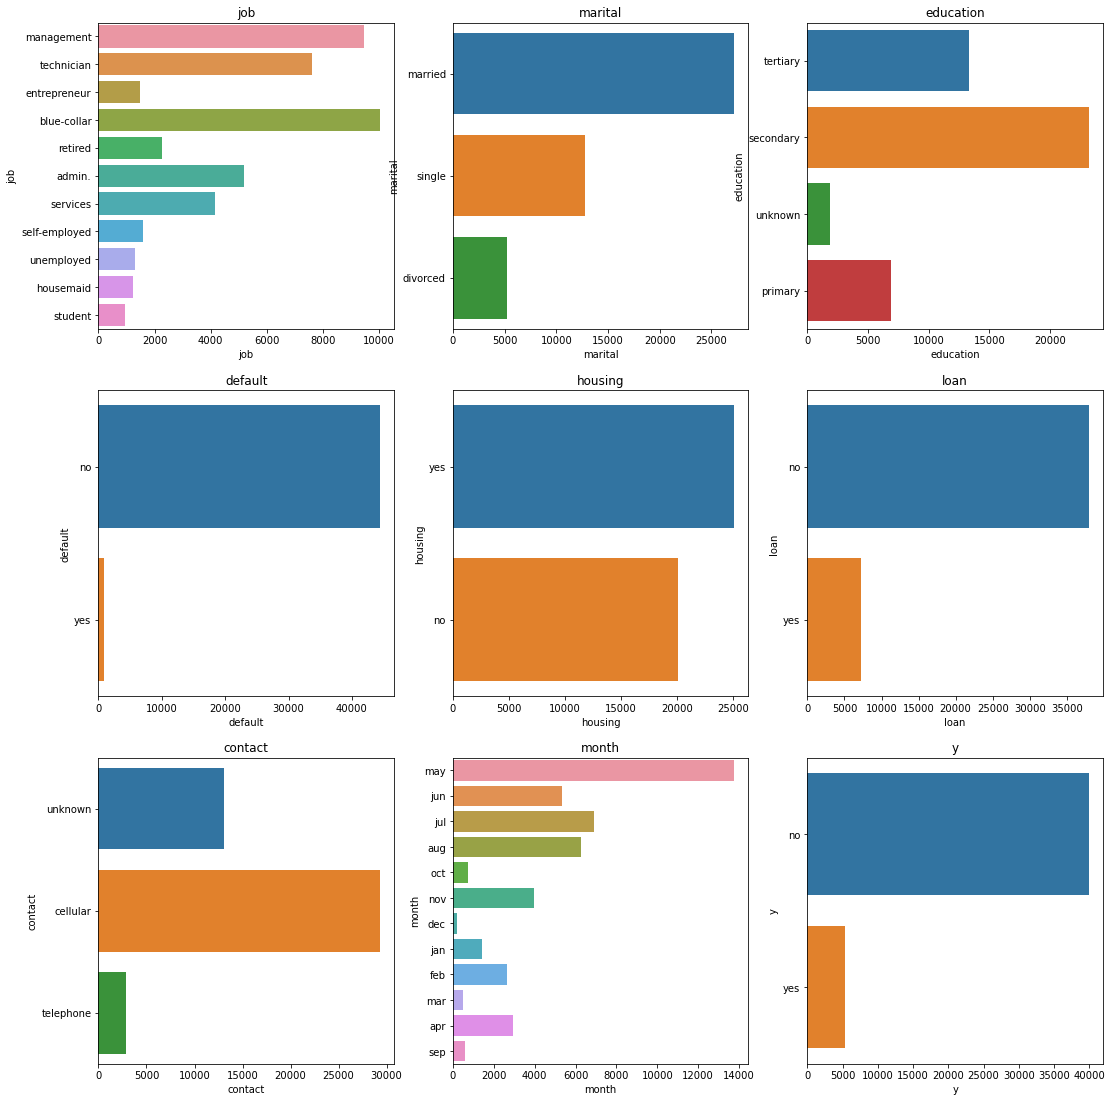

In [804]:
#check count based on categorical features
plt.figure(figsize=(18,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bank)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# Summary of categorical variables
#### Blue collar and Management job customers are high in count when compared to every other job_type.
#### Most of the customers come under secondary education.
#### Most of the costumers are mmarried.
#### There is a little gap between who have house loan and who haven't.
#### Most of the peoples are targeted who haven't any personal loan on them.
#### As we can see most of the customers do not default their credit.
#### Most of the people use cellular phone during contact.
#### We can observe that from the month of May to August there are lot of occurrences.
#### Comparatively very less number of peoples are suscribe to a term deposit.

# Distribution of numerical variable upon target variable.
#### (here 'y' is our target variable)

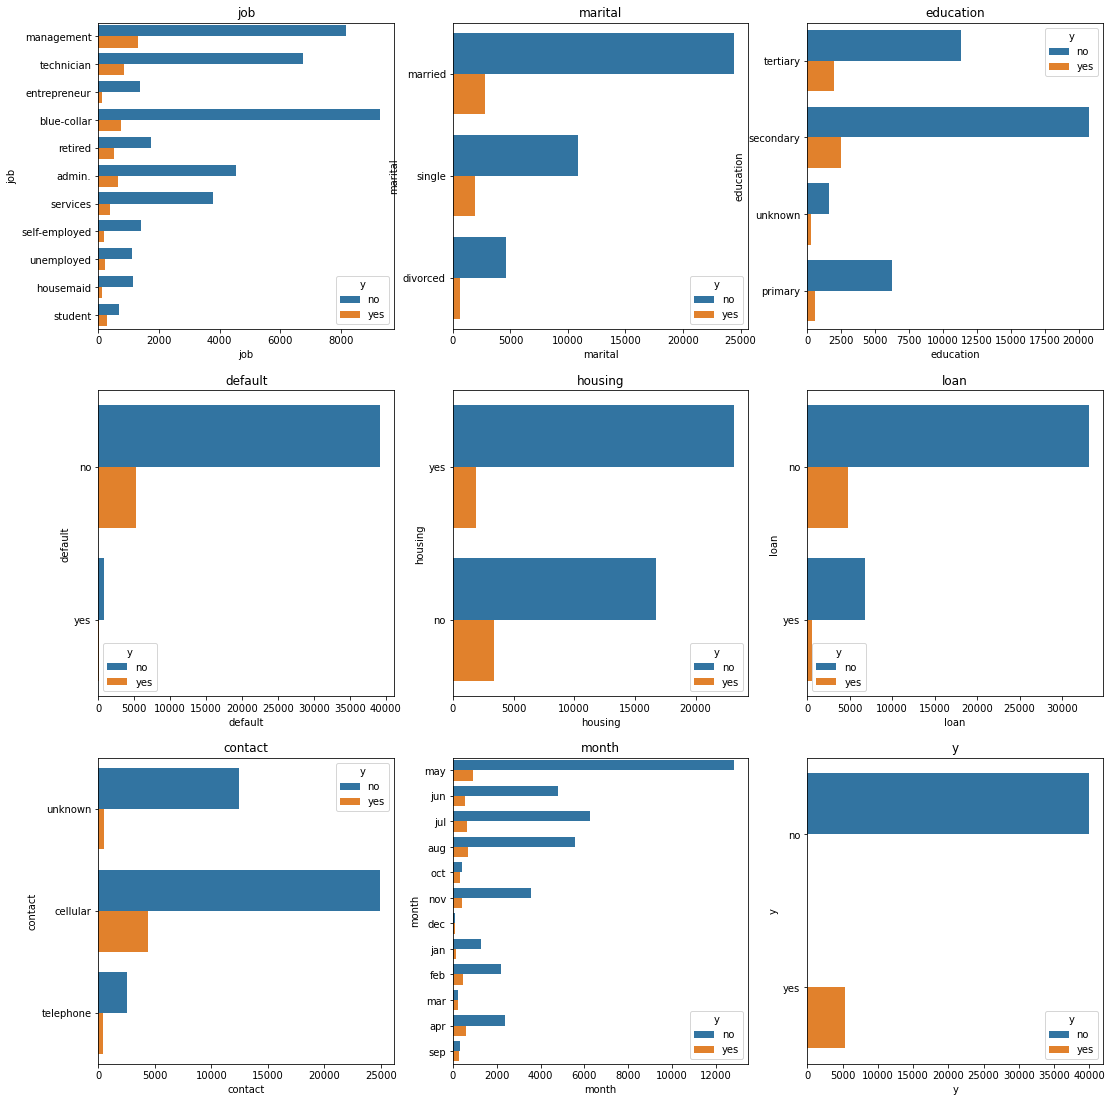

In [805]:
# creating comparative count plots
plt.figure(figsize=(18,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bank,hue='y')
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# Summary of categorical variables related to target variabe
#### Customers with 'blue-collar' and 'management' jobs are less intrested to subscribe for term depositretired client has high interest on deposit.
#### client who has housing loan seems to be not interested much on deposit
#### Married customers are less likely to subscribe for term deposit.
#### if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
#### in month of March, September, October and December, client show high interest to deposit
#### in month of may, records are high but client interst ratio is very less
#### Customers with 'cellular' type of contact are less likely to subscribe for term deposit

# Distribution of numerical variables

<AxesSubplot:xlabel='age', ylabel='Density'>

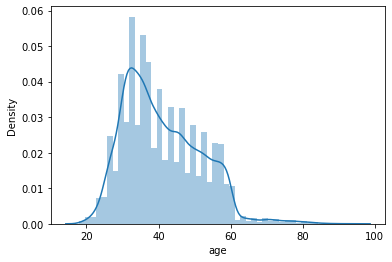

In [806]:
#distribution of age variable
sns.distplot(bank['age'])

#### There is a skew with the distribution of age.

#### The young age group i.e 20-30 customers and old age above 60 customers normally do not tend to invest in long term deposits. Lets see how the age affect the target coloumn in the further analysis.

<AxesSubplot:xlabel='balance', ylabel='Density'>

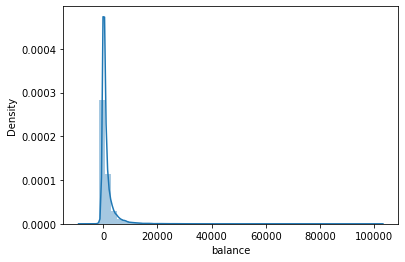

In [807]:
# distribution of balance variable
sns.distplot(bank['balance'])

#### Most of the customer posses very low balance and negative balance.

#### Logically customers with very low balance do not tend to invest more in long term deposits.

# Relation between numerical variable

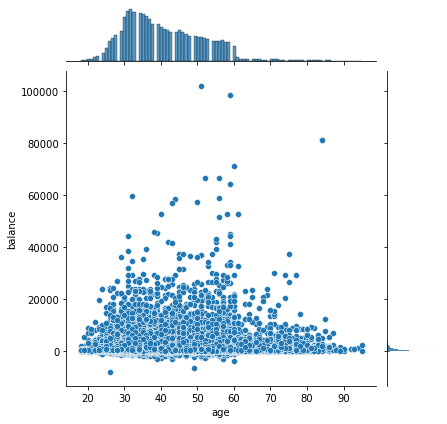

In [808]:
# scatter plot to see relation between age and balance
sns.jointplot('age','balance',data=bank)

#### There is no relation between  age and balance.

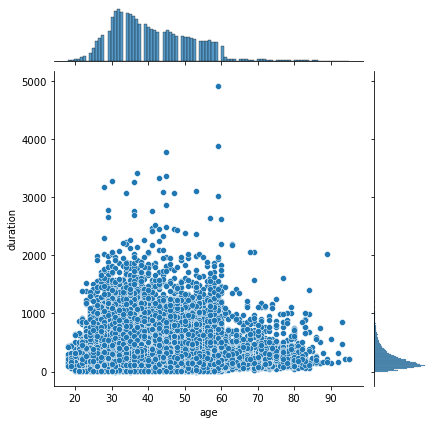

In [809]:
# scatter plot to see relation between age and duration
sns.jointplot(bank.age,bank.duration)

#### There is almost zero correlation between Age and Duration,Balance.

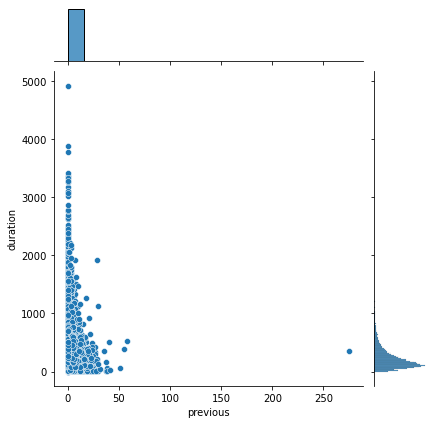

In [810]:
sns.jointplot(bank.previous,bank.duration)

#### The customer who were never been contacted before this campaign has spent lot of time on the call.

# Correlation between numerical variable

In [811]:
#convert target variable to numeric ti see corelation
bank['y']= bank.y.map({'yes':1,'no':0})

<AxesSubplot:>

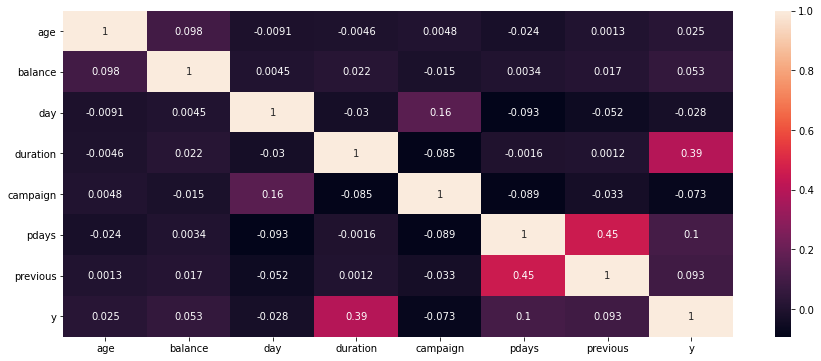

In [812]:
#creating heatmap to see corelation
plt.figure(figsize=(15,6))
sns.heatmap(bank.corr(),annot=True)

## Observation:
### Over numerical features have very less correlation between them.
### pdays and previous have higher correlation
### duration have a higher correlation with our target variable

Text(0.5, 0, 'Job Type')

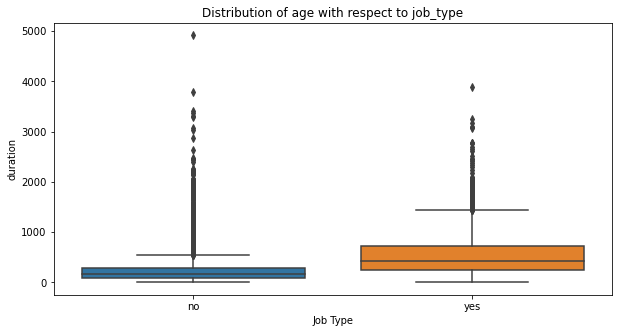

In [813]:
# to see distribution of duration upon target variable we created box plot
plt.figure(figsize=(10,5))
ax=sns.boxplot(x=data['y'],y=data['duration'])
ax.set_title('Distribution of age with respect to job_type')
ax.set_xlabel('Job Type')

## Observation
#### From the plot we can see that if the duration of call increases then the customer subscibes for the long term deposit which supports the obvious fact of customer who has the interest spends lot of time knowing about it.

Text(0.5, 0, 'Job Type')

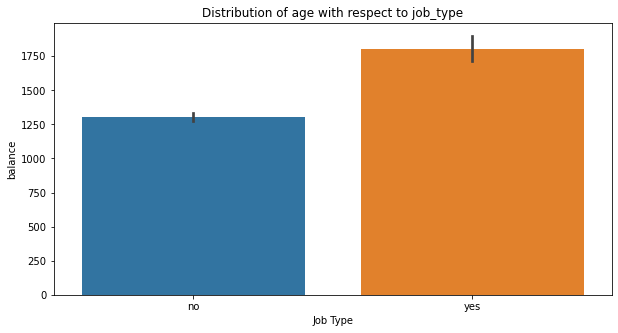

In [814]:
# to see distribution of balance upon target variable we created bar plot
plt.figure(figsize=(10,5))
ax=sns.barplot(x=data['y'],y=data['balance'])
ax.set_title('Distribution of age with respect to job_type')
ax.set_xlabel('Job Type')

## Observation:
#### From this graph we came to know that who have whos have higer balance they mostly prefer to subscribed to a term deposit.

In [815]:
# changed pdays column numerical to categorical by binning
bank['passed_days'] = pd.cut(bank.pdays, [-2,0,30,100,365,999], labels = ['contact after campaign','recently contact','contact long ago','contact very long ago','contact years ago'])

<AxesSubplot:xlabel='passed_days', ylabel='count'>

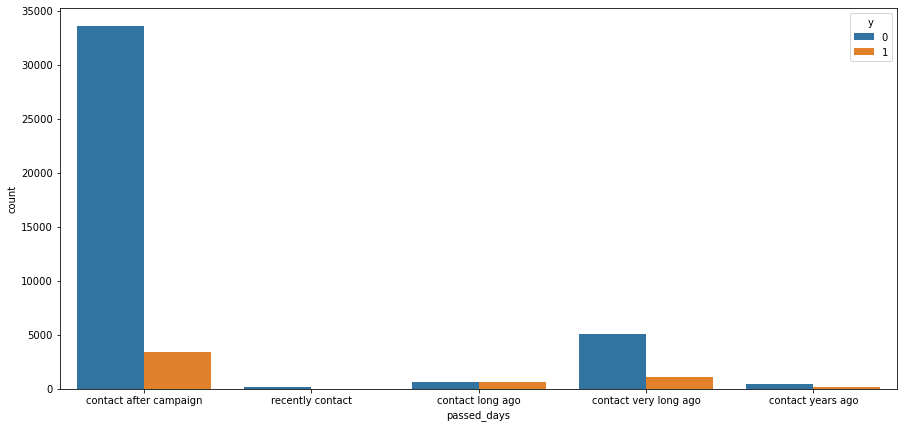

In [816]:
#creating countplot
plt.figure(figsize=(15,7))
sns.countplot(x= 'passed_days', data = bank,hue="y")

## Observation:
### From thi graph we came to know that more than 70% calles are performed after campaign.

Text(0.5, 0, 'Job Type')

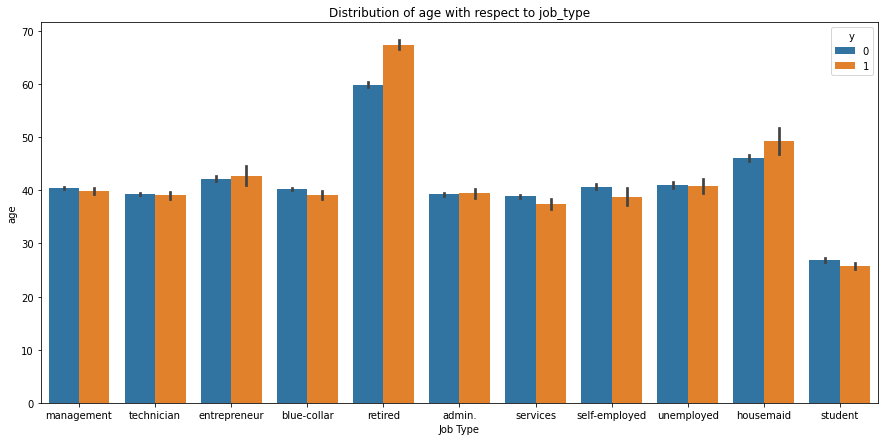

In [817]:
#to see age and job distribution upon target variable we cewated bar plot
plt.figure(figsize=(15,7))
ax=sns.barplot(x=bank['job'],y=bank['age'],hue=bank['y'])
ax.set_title('Distribution of age with respect to job_type')
ax.set_xlabel('Job Type')

### From this graph we came to know that retired and housemaid job group people shows more intrest in this scheme.

In [818]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
bank['age_group'] = pd.cut(bank.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])

<AxesSubplot:xlabel='age_group', ylabel='balance'>

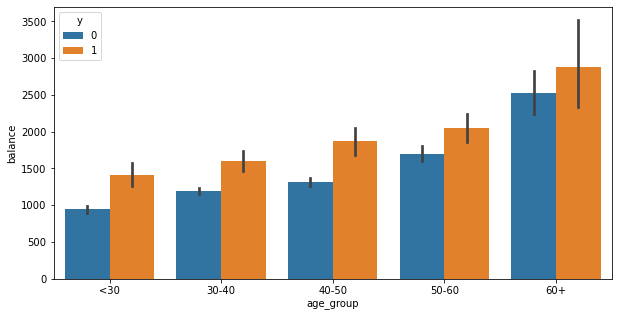

In [819]:
# creating barplot
plt.figure(figsize=(10,5))
sns.barplot(x='age_group',y='balance',data=bank,hue='y')

#### 60+ agegroup prople has higher balance and also higher balance group peoples are mostly prefer to subscribed to a term deposit

# Separate the dataset

In [820]:
#separate the dataset according who's are subscribed to a term deposit.
df1 = bank[bank['y'] == 1]
df1.head(5)
   

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,passed_days,age_group
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,1,contact after campaign,50-60
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,1,contact after campaign,50-60
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,1,contact after campaign,40-50
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,1,contact after campaign,50-60
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,1,contact after campaign,50-60


In [871]:
#grouping some variable to findout the common factor who's are subscribed to a term deposit 
sd=df1[['job','marital','loan','housing','passed_days','campaign','y']].groupby(['job','marital','loan','housing','passed_days','campaign'], as_index=False).count().sort_values(by='y', ascending=False)
sd.head(20)

,job,marital,loan,housing,passed_days,campaign,y
5720,management,married,no,no,contact after campaign,1,108
7040,retired,married,no,no,contact after campaign,1,105
6160,management,single,no,no,contact after campaign,1,79
11440,student,single,no,no,contact after campaign,1,72
1870,blue-collar,married,no,yes,contact after campaign,1,71
12760,technician,single,no,no,contact after campaign,1,59
12320,technician,married,no,no,contact after campaign,1,58
440,admin.,married,no,no,contact after campaign,1,57
6161,management,single,no,no,contact after campaign,2,55
5721,management,married,no,no,contact after campaign,2,55


### Mostly peoples who's haven't any personal loan on them and from management job groups are likely subscribed to a term deposit comparatively more than other's.

In [867]:
# grouping categorical cariable
group1 = df1.groupby(['age_group','marital','education','contact']).count()
dl = group1['y'].groupby(level=0, group_keys=False)
dl.nlargest(4)

age_group  marital   education  contact  
<30        single    secondary  cellular     405
                     tertiary   cellular     346
           married   secondary  cellular      88
           single    secondary  unknown       51
30-40      married   secondary  cellular     373
           single    tertiary   cellular     363
           married   tertiary   cellular     341
           single    secondary  cellular     236
40-50      married   secondary  cellular     266
                     tertiary   cellular     189
           single    tertiary   cellular      65
           married   primary    cellular      63
50-60      married   secondary  cellular     216
                     tertiary   cellular     146
                     primary    cellular      82
           divorced  secondary  cellular      67
60+        married   secondary  cellular     112
                     primary    cellular      78
                     tertiary   cellular      74
                     second

### Very less number of divorced and primary education group of peoples are subscribed to a term deposit
### Most of the people who subscribed to a term deposit using cellular phone.

In [840]:
#separate the dataset according who's are not subscribed to a term deposit.
df2 = bank[bank['y'] == 0]
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,passed_days,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,contact after campaign,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0,contact after campaign,40-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,contact after campaign,30-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,contact after campaign,40-50
4,33,blue-collar,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0,contact after campaign,30-40


In [873]:
#grouping some variable to findout the common factor who's are not subscribed to a term deposit 
bd=df2[['job','marital','loan','housing','campaign','y']].groupby(['job','marital','loan','housing','campaign'], as_index=False).count().sort_values(by='y', ascending=False)
bd.head(20)

,job,marital,loan,housing,campaign,y
255,blue-collar,married,no,yes,1,1454
256,blue-collar,married,no,yes,2,1148
702,management,married,no,yes,1,773
675,management,married,no,no,1,614
1374,technician,married,no,yes,1,589
676,management,married,no,no,2,587
257,blue-collar,married,no,yes,3,547
703,management,married,no,yes,2,533
65,admin.,married,no,yes,1,499
349,blue-collar,single,no,yes,1,494


### Mostly peoples who's are married and have any personal loan on them and mostly from blue-collar  job groups are not intrested to subscribed to a term deposit.

# Insights

### Contact: by Celullar. It also could be by telephone, but this needs more consideration.
### Month: There are most contacts in May so the number of successful cases is highest. However, the successful rate is just about 50%. We should spend more time in: Feb, Mar, April (espcially higher), Sep, Oct, Dec.
### Duration of the last contact: above 300s. It seems that if clients spend more than 5 minutes to talk to you, there is a higher change that they will get a Deposit.
### Number of contact performed during this campaign: below 3. We shouldn't contact clients more than 3 times or they will get annoyed.
### Number of days that passed by after the client was last contacted: less than 25 days. It is best at -1 day (  After campaign  day). There is also a good chance that client has never been contacted will also get a Term deposit.
### Housing loan: People with no housing loan tend to get a term deposit. Maybe because when they do not have housing loan, they have more cash to open a deposit.
### The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.